## 데이터 분석하기

### 데이터 불러오기

실습에서 사용할 데이터는 MovieLens1M라는 데이터 셋입니다.
MovieLens1m 데이터 셋은 grouplens에서 받을 수 있습니다.
연구 및 실습용으로만 사용할 수 있고 재배포하거나 상업적으로는 사용할 수 없다는 점, 참고해주세요!

데이터 및 라이선스에 대한 자세한 설명은 READMe.txt에서 확인하실 수 있습니다.

#### 데이터 다운로드

먼저 실습 환경에 MovieLens1M 데이터를 받아봅시다. grouplens서 제공해주는 다운로드 링크를 사용하면 바로 다운로드받을 수 있습니다.

클라우드 환경에서 데이터를 바로 다운로드하려면 wget이라는 명령어로 데이터를 받을 수 있습니다.

명령어의 의미는 아래와 같습니다.

- mkdir : 디렉토리 만들어 줘.
- wget : 링크 데이터를 받아주는데 -O 옵션 경로로 받아줘.

In [1]:
import os, zipfile, urllib.request

# 1️⃣ 폴더 생성
os.makedirs("./autoint", exist_ok=True)

# 2️⃣ 다운로드
url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
zip_path = "./autoint/ml-1m.zip"

if not os.path.exists(zip_path):
    print("Downloading MovieLens 1M dataset...")
    urllib.request.urlretrieve(url, zip_path)
    print("✅ Download complete:", zip_path)
else:
    print("Already exists:", zip_path)

# 3️⃣ 압축 해제
extract_path = "./autoint/ml-1m"
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zf:
        zf.extractall(extract_path)
    print("✅ Unzipped to:", extract_path)
else:
    print("Already unzipped.")

# 4️⃣ 파일 목록 확인
print("\n📂 Files inside:")
for root, dirs, files in os.walk(extract_path):
    for f in files:
        print(" -", os.path.join(root, f))

Already exists: ./autoint/ml-1m.zip
Already unzipped.

📂 Files inside:
 - ./autoint/ml-1m\ml-1m\movielens_rcmm_v1.csv
 - ./autoint/ml-1m\ml-1m\movielens_rcmm_v2.csv
 - ./autoint/ml-1m\ml-1m\movies.dat
 - ./autoint/ml-1m\ml-1m\movies_prepro.csv
 - ./autoint/ml-1m\ml-1m\ratings.dat
 - ./autoint/ml-1m\ml-1m\ratings_prepro.csv
 - ./autoint/ml-1m\ml-1m\README
 - ./autoint/ml-1m\ml-1m\users.dat
 - ./autoint/ml-1m\ml-1m\users_prepro.csv


### 데이터 살펴보기

자, 이렇게 데이터 압축이 풀렸습니다. 그럼 MovieLens1M 데이터를 간단하게 살펴볼까요?

그 전에 먼저 데이터 분석에 앞서서 분석을 위한 환경을 먼저 갖춰야합니다.

데이터 분석을 위해 plotly 라이브러리 하나를 설치해 줍시다.
시각화를 위한 라이브러리인데요. matplotlib이나 seaborn 등과 마찬가지로 많이 사용하는 라이브러리입니다.
시각적 요소가 잘 보이는 것도 장점이지만, 상호작용(interacting)되는 것이 큰 장점입니다.

In [2]:
# 라이브러리 호출
import re
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [4]:
data_path = './autoint/ml-1m\ml-1m'

In [5]:
# 데이터를 불러옵니다.
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

#### 1. 데이터 users: user 정보

사용자 정보는 user_id, gender, age, occupation, zip 정보로 구성되어 있습니다.

- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- gender: M or F
- age: 18세 이하는 1, 18 ~ 24세는 18, 25 ~ 34는 25 등과 같이 구성되어 있음
- occupation: 2는 artist, 8은 farmer 등으로 숫자값으로 매핑되어 있음


In [6]:
display(users.shape, users.head())

(6040, 5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


#### 2. 데이터 ratings: rating 정보

사용자의 평점이 담겨 있는 데이터입니다. 아래와 같이 데이터가 저장되어 있습니다.

user_id, movie_id, rating, timestamp 컬럼으로 데이터 저장
- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- movie_id: 1부터 3952로, 익명의 정보로 되어 있음
- rating: 5점 평점
- timestamp: Unix timestamp로 되어 있음.

In [7]:
display(ratings.shape, ratings.head())

(1000209, 4)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### 3. 데이터 movies: movie 정보

영화 정보가 담겨져 있는 데이터입니다. 아래와 같이 데이터가 저장되어 있습니다.

movie_id title, genres 컬럼으로 데이터 저장
movie_id : 1부터 3952로, 익명의 정보로 되어 있음
title: 영화 제목과 연도가 함께 입력되어 있음
genres: Action, Comedy 등의 장르가 입력되어 있음

In [8]:
display(movies.shape, movies.head())

(3883, 3)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 데이터 분석

추천 시스템을 구축하기에 앞서 다음과 같이 데이터를 간단하게 살펴보고자 합니다.

사전에 데이터를 이해하는 것은 매우 중요한데요, 그 이유는 데이터를 파악하지 않고 모델을 구축하면 원하는 문제가 해결되지 않기 때문입니다. 따라서 데이터가 바라는 방향(분류인지, 점수 예측인지 등), 특징(편향이 되어 있는지 등)등을 파악하고 모델을 구성해야 합니다.

여기서 간단하게 보고자 하는 데이터 분석 항목은 다음과 같습니다.

- 장르별 영화 수
- 연도별 영화 수
- 평점 분포
- 장르별 평점

#### 1. 영화 데이터(movies)

영화 데이터에는 영화 ID(movie_id), 영화 제목(title), 장르(genres)의 정보만 포함되어 있습니다. 하지만 이 데이터의 정보를 분리해서 연도별 분석, 장르별 분석이 가능하게 할 수 있습니다.

가장 먼저, 영화의 제목과 연도를 분리해 봅시다.

영화 제목을 보면 'Toy Story (1995)'와 같이 영화 제목과 연도가 같이 입력되어 있는데요. 영화 제목에서 연도만 뽑아내면 연도와 영화 제목으로 나눌 수 있겠죠?

정규표현식을 이용해서 영화 제목에서 연도를 뽑아냅시다.

In [9]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


장르별 영화 개수

In [11]:
# plotly 버전(로컬 환경 또는 클라우드 노트북 환경에서 실행시켜 주세요!)
px.histogram(movies_exploded, x='genres_split', height=450, title='장르별 영화 수').update_xaxes(categoryorder="total descending")

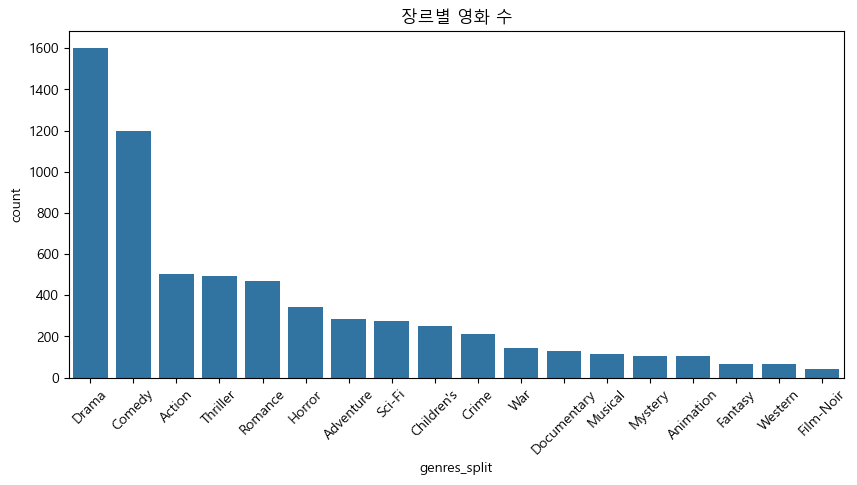

In [12]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order=movies_exploded['genres_split'].value_counts().index)
plt.gcf().set_size_inches(10, 4.5)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)
plt.show()

 연도별 영화 개수

In [13]:
# plotly 버전
movie_count_by_year = px.histogram(movies, x='year', height=450, title='연도별 영화 수').update_xaxes(categoryorder="total descending")
movie_count_by_year

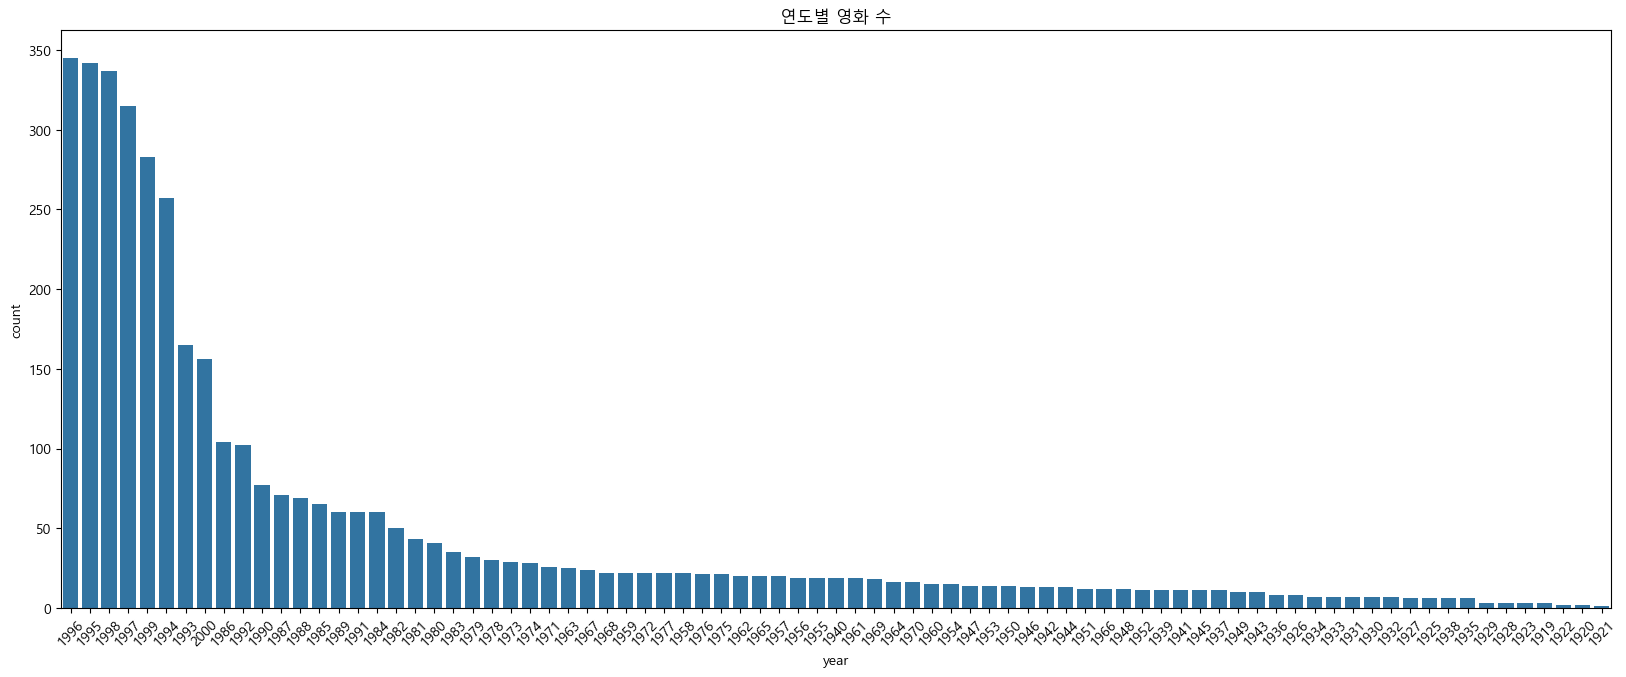

In [14]:
# seaborn 버전
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)
plt.gcf().set_size_inches(20, 7.5)
plt.title('연도별 영화 수')
plt.xticks(rotation=45)
plt.show()

#### 2. 평점 데이터(ratings)
이제 평점 데이터로 영화를 분석해보겠습니다.
평점 데이터에서는 평균 평점이나 장르별 평점과 같이 다양한 관점으로 분석할 수 있습니다.

평균 평점과 장르별 평점을 살펴봅시다.

먼저, 평점 데이터에서 movie_id를 기준으로 평점을 평균냅시다. 이는 groupby를 이용하면 빠르게 구할 수 있습니다.

In [15]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg 

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


평점 분포

In [16]:
# plotly 버전
px.histogram(mv_rating_agg, x='avg_rating', height=450, title='평점 분포')

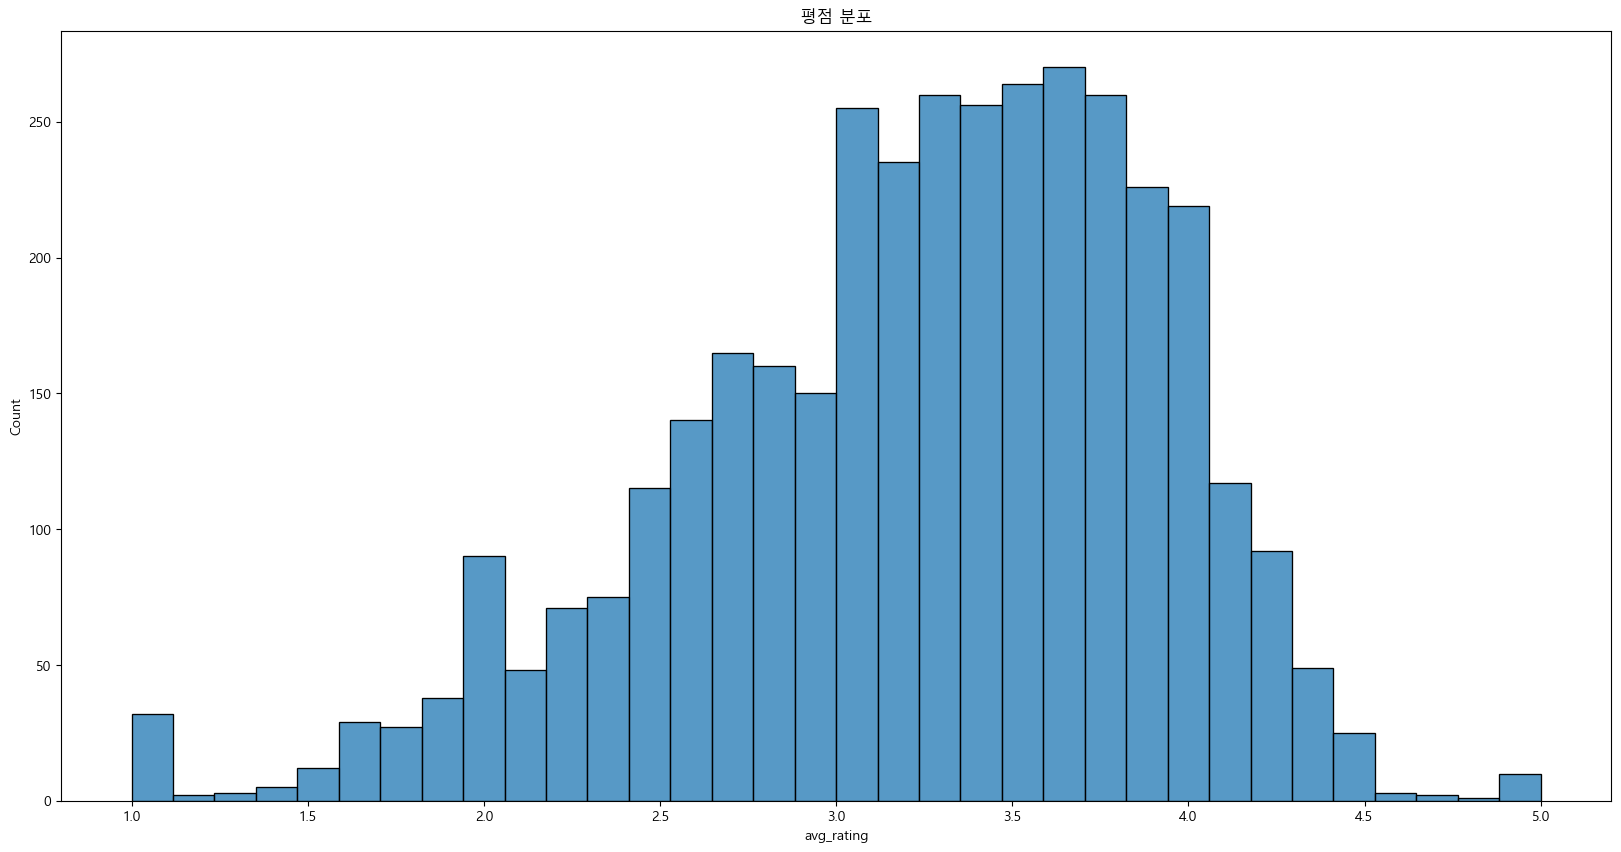

In [17]:
# seaborn 버전
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('평점 분포')
plt.show()

#### 3. 장르별 평점 분포
마지막으로 장르를 기준으로 평점 분석을 해보겠습니다.

위에서 우리는 장르를 genres_split으로 나누어 봤었는데요, 이 데이터를 활용해 장르 분포를 살펴볼 것입니다. 왜냐하면 하나의 영화에는 1개 이상의 장르가 연결되어 있기 때문입니다.

예를 들어 'Toy Story (1995)'는 3개(Animation, Children's, Comedy)의 장르를 가지고 있으니, 토이스토리 평점이 4점이라면 각 장르의 대한 점수도 4점이라고 가정하는 것이죠.

In [18]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


In [19]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [20]:
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

In [21]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [22]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


In [23]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_mean', height=350, title='장르별 평점').update_xaxes(categoryorder="total descending")

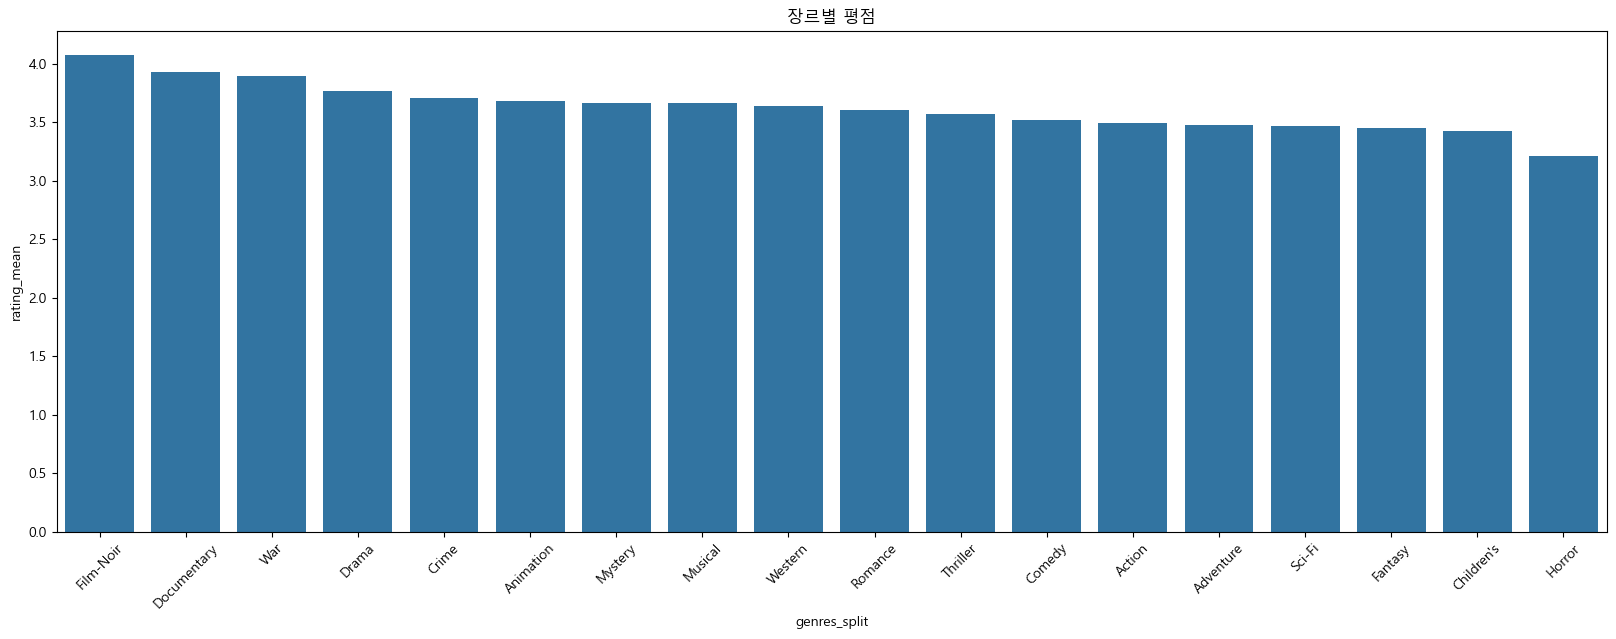

In [24]:
# seaborn 버전
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('장르별 평점')
plt.xticks(rotation=45)
plt.show()

In [25]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_count', height=350, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

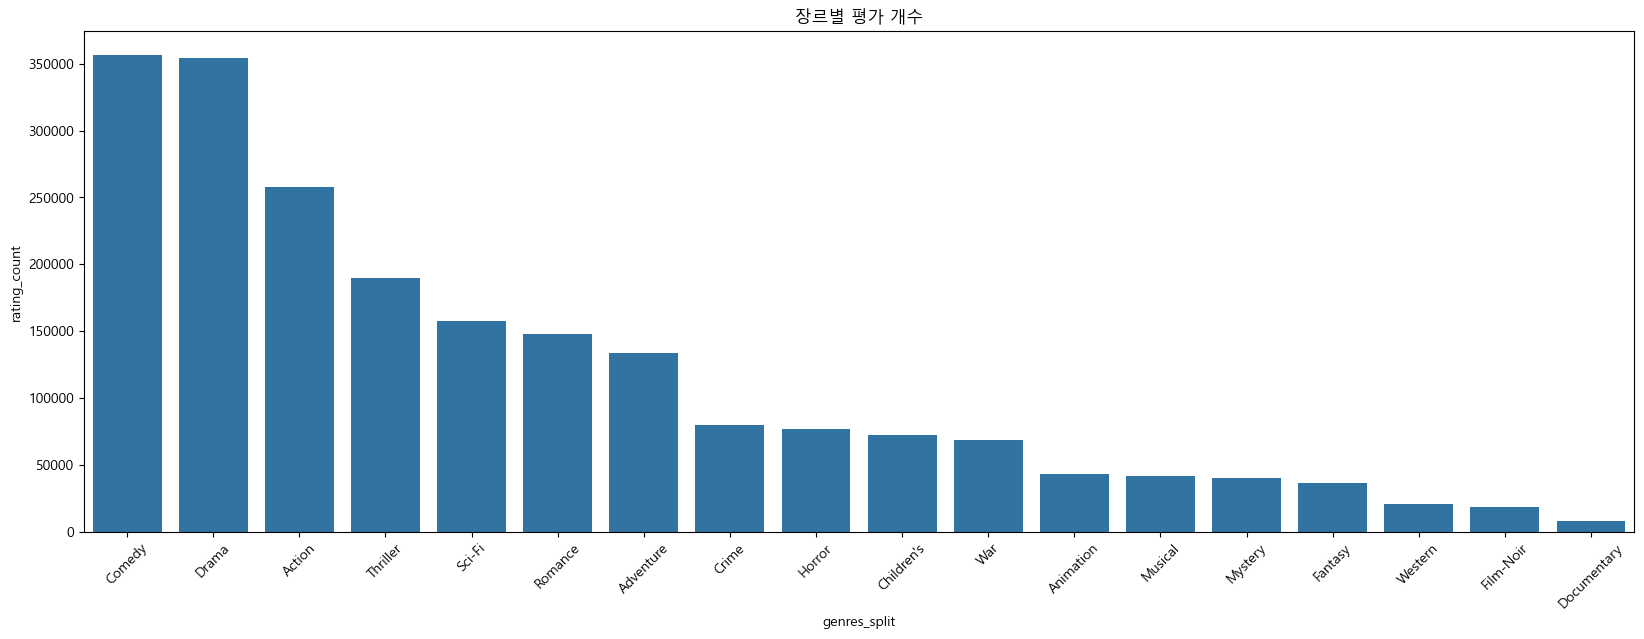

In [26]:
# seaborn 버전
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('장르별 평가 개수')
plt.xticks(rotation=45)
plt.show()

### 데이터 분석 마무리
간단하게 MovieLens1M 데이터를 살펴보았습니다. 복잡한 데이터가 아니니까 어느 정도는 'MovieLens1M 데이터는 이런 데이터구나'라는 감을 잡으셨을 것 같습니다.

이제부터는 실제 모델 훈련에 사용할 수 있도록 데이터를 전처리해보고 훈련용 데이터를 만들어 볼 것입니다.

아래는 참고용으로 제공해 드리는 코드입니다. 만약 사용자 데이터(users)와 사용자가 가지고 있는 직업(occupation)을 매핑해서 데이터를 깊게 살펴보고 싶다면 사용해 보세요.

In [27]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [28]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


## 데이터 전처리
이번에는 데이터를 전처리하고, 훈련용 데이터를 세팅하는 과정을 정리해 보려고 합니다.

원본 데이터를 그대로 모델에 넣는 것은 좋은 성능을 이끌어내기 힘들 수 있습니다.
특히 추천 시스템은 사용자와 아이템 사이의 상호작용을 모델링해야 하므로 데이터를 어떻게 설계하느냐에 따라 사용자와 아이템의 상호작용이 불가능할 수도 있습니다.

이번에 우리가 실습할 모델에서는 다음과 같은 피처(feature)들에 대해서 상호작용을 모델링하려고 합니다.

- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업
- 영화 : 영화 ID, 장르, 시기
- 평점 : 사용자 ID, 영화 ID, 평점, 시기

즉 '어떤 사용자가 어떤 영화를 언제, 몇 점의 평가를 주었다'는 상호작용 데이터를 활용할 것입니다.

먼저 각 데이터를 다시 불러와서 확인해 봅시다.

In [29]:
# 라이브러리 호출
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import random
plt.rc('font', family='NanumMyeongjo')

In [30]:
# 컬럼 정보 지정
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [31]:
# 데이터 불러오기
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [32]:
# 사용자 데이터 확인
display(users.shape, users.head())

(6040, 5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [33]:
# 영화 데이터 확인
display(movies.shape, movies.head())

(3883, 3)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
# 평점 데이터 확인
display(ratings.shape, ratings.head())

(1000209, 4)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 영화 데이터 전처리

영화 데이터(movies)를 전처리해 봅시다.

이전에는 영화 제목과 연도를 분리하는 과정만 진행했지만 이번에는 한 가지의 데이터를 더 추출해보려고 합니다.

바로 '년대'인데요, 예를 들어, 1995년에 개봉한 영화는 '90년대' 영화라고도 많이 말하죠. '년대' 정보를 뽑아내는 과정을 추가하려고 합니다.

왜냐하면 영화나 음악을 언급할 때 흔히 90년대 영화, 20년대 음악과 같이 '년대'식으로 많이 표현하기 때문이죠. 어떻게 보면 '년대'는 사람들에게 있어 중요한 정보가 될 수 있습니다.

In [35]:
# 제목 뒤에 붙어 있는 연도를 정규표현식을 활용해 추출합니다.
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,movie_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [36]:
a = 1995 % 10
b = 1995 - a

print(a, b)

5 1990


In [37]:
# 90년대 영화, 2000년대 영화 등과 같은 년대 정보를 추출합니다.
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

# title 컬럼에서 연도 정보를 빼고 제목만 따로 추출합니다.
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

movies.head()

,movie_id,title,genres,movie_year,movie_decade
0,1,Toy Story,Animation|Children's|Comedy,1995,1990s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990s
2,3,Grumpier Old Men,Comedy|Romance,1995,1990s
3,4,Waiting to Exhale,Comedy|Drama,1995,1990s
4,5,Father of the Bride Part II,Comedy,1995,1990s


In [38]:
# | 기호를 기준으로 장르 데이터를 분리합니다.
genres_split = movies['genres'].str.split('|')

In [39]:
max_genres = genres_split.apply(len).max()

# 각 장르별로 새로운 컬럼을 생성합니다.
for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

# 원래 있던 장르 컬럼은 날려줍니다.
movies.drop('genres', axis=1, inplace=True)

# None은 공백으로 채웁니다.
movies.fillna('', inplace=True)

In [40]:
display(movies.shape, movies.head())

(3883, 10)

,movie_id,title,movie_year,movie_decade,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story,1995,1990s,Animation,Children's,Comedy,,,
1,2,Jumanji,1995,1990s,Adventure,Children's,Fantasy,,,
2,3,Grumpier Old Men,1995,1990s,Comedy,Romance,,,,
3,4,Waiting to Exhale,1995,1990s,Comedy,Drama,,,,
4,5,Father of the Bride Part II,1995,1990s,Comedy,,,,,


In [41]:
set(movies['genre1'].unique().tolist() + movies['genre2'].unique().tolist() + movies['genre3'].unique().tolist())

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### 평점 데이터 전처리
평점 데이터(ratings)도 조금 더 세분화하여 쪼갤 수 있습니다. 바로 timestmap를 이용하면 되는데요.

앞서 ratings에 있는 timestamp는 Unix timestamp라고 언급하였습니다. Unix timestamp란 1970년 1월 1일 00:00:00 UTC 이후 경과한 '초' 수를 말합니다. 따라서 '연-월-일' 로 변환이 필요합니다.

'년-월-일'로 변환하는 방법은 간단합니다. Unix timestamp는 워낙 많이 사용하기 때문에 이미 파이썬 내장 함수에도 기능이 존재기 때문이죠. datetime의 fromtimestamp 함수를 사용하면 바로 변환할 수 있습니다.

In [42]:
timestamp = 978300760
dt_object = datetime.fromtimestamp(timestamp)

print(dt_object.strftime("%Y-%m-%d"))

2001-01-01


In [43]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2001-01-01
1,1,661,3,2001-01-01
2,1,914,3,2001-01-01
3,1,3408,4,2001-01-01
4,1,2355,5,2001-01-07


In [44]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split("-")[0])
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split("-")[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

ratings.head()

,user_id,movie_id,rating,timestamp,rating_year,rating_month,rating_decade
0,1,1193,5,2001-01-01,2001,01,2000s
1,1,661,3,2001-01-01,2001,01,2000s
2,1,914,3,2001-01-01,2001,01,2000s
3,1,3408,4,2001-01-01,2001,01,2000s
4,1,2355,5,2001-01-07,2001,01,2000s


In [45]:
# 저장
movies.to_csv(f"{data_path}/movies_prepro.csv", index=False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index=False)
users.to_csv(f"{data_path}/users_prepro.csv", index=False)

### 모델 입력 데이터 생성
추천 시스템에 활용되는 데이터는 크게 아래와 같이 구분될 수 있습니다.

명식적 데이터(Explicit data): 사용자가 직접적으로 선호도를 표현한 데이터(예: 평점, 구독, 댓글, 리뷰, 좋아요, 싫어요, 차단 등)
암묵적 데이터(Implicit data): 사용자가 간접적으로 선호도를 표현한 데이터(예: 클릭 여부, 검색 기록, 방문 페이지, 마우스 움직임, 구매 내역, 시청 시간대 등)
명시적 데이터, 예를 들어 평점 데이터라면 1~5점과 같은 분포로 데이터가 존재하게 되고 이는 이진 분류(binary classification) 문제라기 보다 회귀(regression) 문제나 다중 분류(multiclass classification) 문제라고 볼 수 있을 것입니다.

하지만 암묵적 데이터인 클릭 여부로 보면 어떨까요?

클릭 여부는 '클릭을 했다, 안했다'와 같이 0과 1로 분리할 수 있습니다. 이 때 클릭을 했다는 것은 '선호'한다라는 의미도 담고 있기에, 선호 정보를 모델링한다고도 볼 수 있습니다.

무엇이 정답인지는 따로 정해진 바가 없습니다. 데이터와 서비스 전략에 따라 정답은 달라집니다.

이번 프로젝트에서는 '선호했다'를 기준으로 살펴보려고 합니다.

그런데 여기서 문제가 하나 있습니다. 그럼 '선호했다'라는 정보는 무엇이고 '선호하지 않는다'라는 정보는 무엇일까요? 그리고 그런 데이터가 MovieLens에 있을까요? 이 문제를 풀어나가보려고 합니다.

#### 1. 랜덤 샘플링 기반 방법
우리가 가지고 있는 데이터에서 '선호도'를 뽑아내기 위한 데이터로는 평점 데이터(ratings)가 있습니다. 사용자가 영화에 평점을 매긴 데이터이죠.

문제는 평점이 1부터 5점까지라서 '어떤 것을 선호한다'라고 말하기 어렵습니다. 그래서 여기서부터는 가설을 세우고 진행하는 것이 좋습니다.

우리는 먼저 랜덤 샘플링 기반 방법으로 '선호', '비선호'를 추출할 겁니다. 순서는 아래와 같습니다.

- 선호 데이터를 추출한다.
  - 사용자가 3점 이상의 점수를 부여한 영화를 '선호'한다고 가정한다.
  - 이 데이터는 label=1인 값이다.
- 비선호 데이터를 추출한다.
  - 2-1. 사용자가 선호했던 영화 리스트를 추출한다
  - 2-2. 전체 영화 중 사용자가 선호한다고 체크하지 않은 영화 리스트를 추출한다. 만약 전체 영화가 100개이고 사용자가 선호한다고 한 영화가 10개라면, 선호하지 않은 영화는 90개이다.
  - 2-3. 영화 리스트 중 일부를 랜덤으로 샘플링한다. 이때 선호 영화 1개당 5개의 비선호 영화를 추출한다. 예를 들어 선호 영화가 10개라면 비선호 영화는 총 50개를 추출한다. 즉 비선호 영화 90개 중 50개를 추출하는 것이다.
  - 2-4. 이 비선호 영화를 label=0으로 세팅한다.

In [46]:
# 1. 3점 이상의 점수를 부여한 영화를 '선호'영화라고 가정하고, 이를 label=1로 생성합니다.
ratings = ratings[ratings['rating'] >= 3]
ratings['label'] = 1
ratings.drop('rating', axis=1, inplace=True)

display(ratings.shape, ratings.head())

(836478, 7)

,user_id,movie_id,timestamp,rating_year,rating_month,rating_decade,label
0,1,1193,2001-01-01,2001,01,2000s,1
1,1,661,2001-01-01,2001,01,2000s,1
2,1,914,2001-01-01,2001,01,2000s,1
3,1,3408,2001-01-01,2001,01,2000s,1
4,1,2355,2001-01-07,2001,01,2000s,1


In [47]:
# 1. 사용자가 봤던(선호했던) 영화 리스트를 추출합니다. 사용자마다 평점이 3점 이상인 영화 리스트가 구성됩니다.
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

,user_id,movie_id
0,1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
1,2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
2,3,"[3421, 648, 1394, 3534, 104, 2735, 1210, 1431,..."
3,4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
4,5,"[2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,..."


In [48]:
# 2. 먼저 고유 영화와 고유 사용자들을 가지고 옵니다.
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()
negative_users = []
negative_movies = []
negative_labels = []

for user in unique_users:
    # 충분한 이력이 없는 사용자는 패스
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1:
        continue
    # 2-1. 해당 사용자가 선호하는 영화 리스트를 가지고 옴
    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0]
    # 2-2. 전체 영화 중 사용자가 선호한 영화 정보를 제외
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list))
    # 2-3. 선호 영화 1개당 비선호 영화 5개를 추출
    sample_pop_size = len(user_seen_movie_list)*5
    # 만약 비선호 영화 샘플 개수가 전체 영화 개수보다 크면, 비선호 영화 샘플 개수는 전체 영화 개수에서 사용자가 선호한 영화의 개수를 뺀 값으로 설정
    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list)*5 :
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)
    # 랜덤으로 추출
    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size)

    # 해당 값들을 리스트에 저장
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]

print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [49]:
negative_ratings_df = pd.DataFrame({'user_id' : negative_users, 'movie_id' : negative_movies, 'label':negative_labels})
display(negative_ratings_df.shape, negative_ratings_df.head())

(4068124, 3)

,user_id,movie_id,label
0,1,3684,0
1,1,3231,0
2,1,2358,0
3,1,1156,0
4,1,408,0


In [50]:
ratings_df = ratings[['user_id', 'movie_id', 'label']]
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)
movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']
user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)

display(merge_mlens_data.shape, merge_mlens_data.head())

(4904602, 10)

,user_id,movie_id,label,decade,movie_year,genre,gender,age,occupation,zip
0,1,1193,1,1970s,1975,Drama,F,1,10,48067
1,1,661,1,1990s,1996,Animation,F,1,10,48067
2,1,914,1,1960s,1964,Musical,F,1,10,48067
3,1,3408,1,2000s,2000,Drama,F,1,10,48067
4,1,2355,1,1990s,1998,Animation,F,1,10,48067


In [51]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','decade', 'movie_year', 'genre', 'gender', 'age', 'occupation', 'zip', 'label']]
display(merge_mlens_data.shape, merge_mlens_data.head())

(4904602, 10)

,user_id,movie_id,decade,movie_year,genre,gender,age,occupation,zip,label
0,1,1193,1970s,1975,Drama,F,1,10,48067,1
1,1,661,1990s,1996,Animation,F,1,10,48067,1
2,1,914,1960s,1964,Musical,F,1,10,48067,1
3,1,3408,2000s,2000,Drama,F,1,10,48067,1
4,1,2355,1990s,1998,Animation,F,1,10,48067,1


In [52]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

#### 2. 선호도로 나누기
위에서 진행한 '1. 랜덤 샘플링 기반 방법'은 그리 좋은 방법은 아닙니다. 왜냐하면 사용자 정보를 무작위로 샘플링을 해서 임의로 데이터를 생성했기 때문입니다. 가장 좋은 것은 원본 데이터를 활용하는 것이죠.

따라서 2번째 과정에서는 샘플링을 하지 않고 데이터를 선호도로 나누려고 합니다. 이후 모델을 훈련할 때도 이 데이터를 활용할 것입니다.

먼저 데이터 전처리를 하고 저장했던 데이터를 불러옵시다.

In [53]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'movie_year', 'movie_decade', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6'],
      dtype='object')


In [54]:
# 1. 4점 이상인 데이터를 1로, 아닌 데이터를 0으로 설정
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >=4).astype(int)
ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

,user_id,movie_id,rating_year,rating_month,rating_decade,label
0,1,1193,2001,1,2000s,1
1,1,661,2001,1,2000s,0
2,1,914,2001,1,2000s,0
3,1,3408,2001,1,2000s,1
4,1,2355,2001,1,2000s,1


In [55]:
# 2. 필요 데이터만 가지고 옵니다. 특히 장르는 3개만 가지고 와서 활용
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

# data merge
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)

display(merge_mlens_data.shape, merge_mlens_data.head())

(1000209, 15)

,user_id,movie_id,rating_year,rating_month,rating_decade,label,movie_decade,movie_year,genre1,genre2,genre3,gender,age,occupation,zip
0,1,1193,2001,1,2000s,1,1970s,1975,Drama,no,no,F,1,10,48067
1,1,661,2001,1,2000s,0,1990s,1996,Animation,Children's,Musical,F,1,10,48067
2,1,914,2001,1,2000s,0,1960s,1964,Musical,Romance,no,F,1,10,48067
3,1,3408,2001,1,2000s,1,2000s,2000,Drama,no,no,F,1,10,48067
4,1,2355,2001,1,2000s,1,1990s,1998,Animation,Children's,Comedy,F,1,10,48067


In [56]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
display(merge_mlens_data.shape, merge_mlens_data.head())

(1000209, 15)

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [57]:
# 저장
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

## AutoInt 모델 구현 및 학습

### 추천 모델 학습
AutoInt 모델은
- 멀티헤드 셀프 어텐션(multi-head self-attention)구조를 활용해 입력 피처들간의 상호작용과 관계성을 모델링
- 쌓아올린 구조(stack)를 통해 서로 다른 차원에서 피처 상호작용 학습
- 고차 상호작용을 명시적(explicitly) & 자동(automatic)으로 학습 의 특징을 가지고 추천 모델을 구성하게 됩니다.

전체 아키텍처는 다음과 같습니다.
![](https://velog.velcdn.com/images/qazsxdc/post/7cc1de51-94e0-4d30-925a-8115817fa0dc/image.png)

여기서 가장 중요한 부분은 바로 '멀티헤드 셀프어텐션 구조를 활용해서 피처간의 상호작용을 모델링한다'입니다. 그렇기에 이 모델의 코드를 이해할 때 해당 부분을 잘 이해하기만 한다면 코드 작업은 끝이라고 볼 수 있습니다.

### 필요한 라이브러리 불러오기

In [58]:
import time, random, math
import pandas as pd
import numpy as np

from tqdm import tqdm
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

### Layer 정의
AutoInt에 사용되는 Layer는 총 3가지입니다.

- 1.임베딩 레이어
  - 임베딩 레이어는 raw input 데이터를 저차원 임베딩 공간에 매핑하는 과정을 의미합니다.
  - 예를 들어 성별이 남, 여가 있다면 이는 각각 0과 1로 매핑될 수 있고, 0에 해당되는 32차원 임베딩 공간, 1에 해당되는 임베딩 공간에 매핑하는 과정이죠.
- 2.다층 퍼셉트론(MLP-Multilayer Perceptron, DNN 구조)
  - 딥러닝을 배우면 거의 가장 먼저 배울 수 있는 구조입니다.
  - 비선형 레이어를 쌓아올린 구조입니다. Dense layer를 쌓아올린 구조라고 보시면 됩니다.
- 3.멀티 헤드 어텐션
  - 쿼리(query), 키(key), 값(value)에 따른 어텐션을 계산하는 구조입니다.
  - 본 모델에서는 셀프 어텐션 구조로 진행됩니다.

#### 임베딩 레이어

- 만약 피처(feature) 3개가 각각 10개, 20개, 30개의 고유값을 가진다면 feature_dims는 [10, 20, 30] 형태를 띄게 됩니다.
- 전체 임베딩을 해야 할 개수는 10+20+30 = 60이므로 '60 x 임베딩_차원_크기'의 행렬이 생성되게 됩니다.

In [59]:
class FeaturesEmbedding(Layer):
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.int32)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x):
        x = tf.cast(x, tf.int32)
        return self.embedding(x + tf.constant(self.offsets, dtype=tf.int32))

#### 다층 퍼셉트론 (DNN Layer)
- Tensorflow Keras에서는 Dense 레이어를 쌓아올린 구조
- 필요에 따라 배치 정규화 사용 가능 

In [60]:
class MultiLayerPerceptron(Layer):
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)
        if output_layer:
            hidden_units += [1]
        self.linears = [Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)) for units in hidden_units[1:]]
        self.activation = tf.keras.layers.Activation(activation)
        if self.use_bn:
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        x = inputs
        for i in range(len(self.linears)):
            x = self.linears[i](x)
            if self.use_bn:
                x = self.bn[i](x, training=training)
            x = self.activation(x)
            x = self.dropout(x, training=training)
        return x

#### 멀티 헤드 어텐션
- 위에 작성한 수식과 같이 동작
- 필요에 따라 잔차 연결(residual connection) 진행

In [61]:
class MultiHeadSelfAttention(Layer):
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        if head_num <= 0:
            raise ValueError('head_num must be a int > 0')
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.seed = seed
        self.scaling = scaling
        super(MultiHeadSelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(input_shape)))
        embedding_size = int(input_shape[-1])
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32, initializer=TruncatedNormal(seed=self.seed))
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     dtype=tf.float32, initializer=TruncatedNormal(seed=self.seed + 1))
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32, initializer=TruncatedNormal(seed=self.seed + 2))
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         dtype=tf.float32, initializer=TruncatedNormal(seed=self.seed))

        super(MultiHeadSelfAttention, self).build(input_shape)

    def call(self, inputs, **kwargs):
        if K.ndim(inputs) != 3:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))

        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        # 헤드 개수에 따라 데이터를 분리
        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))

        # 쿼리와 키를 먼저 곱해줌 
        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        self.normalized_att_scores =  tf.nn.softmax(inner_product)

        # 쿼리와 키에서 나온 어텐션 값을 값에 곱해줌
        result = tf.matmul(self.normalized_att_scores, values)
        # 쪼개어진 멀테 헤드를 모아줌
        result = tf.concat(tf.split(result, self.head_num, ), axis=-1)
        result = tf.squeeze(result, axis=0)

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        result = tf.nn.relu(result)

        return result

    def compute_output_shape(self, input_shape):

        return (None, input_shape[1], self.att_embedding_size * self.head_num)

    def get_config(self, ):
        config = {'att_embedding_size': self.att_embedding_size, 'head_num': self.head_num, 'use_res': self.use_res,'seed': self.seed}
        base_config = super(MultiHeadSelfAttention, self).get_config()
        base_config.update(config)
        return base_config

### AutoInt 모델

In [62]:
class AutoInt(Layer):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

    def call(self, inputs):
        att_input = self.embedding(inputs)
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        att_output = self.final_layer(att_output)
        y_pred = tf.nn.sigmoid(att_output)

        return y_pred

### 평가 지표

In [63]:
# 평가 함수는 아래의 링크에서 가져왔습니다.
# https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true):
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true):
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### 모델 테스트

In [64]:
def test_model(model, test_df):
    user_pred_info = defaultdict(list)
    total_rows = len(test_df)
    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
    return user_pred_info

### 데이터 불러오기 및 세팅

전처리하였던 데이터를 불러옵니다. 이 데이터를 모델에 바로 사용할 수 없는데요. 모델 input으로 넣어 학습하기 위해서는 다음과 같은 과정을 거쳐야 합니다.

- 데이터 불러오기
- 레이블 인코더(label encoder)를 통해 0부터 피처(feature)의 고유 개수까지 매핑
  - 예) 성별: 남(M), 여(F)를 0, 1로 변환
  - 예) 장르: 코메디, 드라마, 액션을 0, 1, 2로 변환
- 학습(train) 데이터와 테스트(test) 데이터로 분리

In [65]:
# 1. 데이터 불러오기
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype=str)
display(movielens_rcmm.shape, movielens_rcmm.head())

(1000209, 15)

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [66]:
# 2. 라벨 인코더(label encoder)
# sklearn의 LabelEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
# label은 제외한 각 컬럼을 돌면서 각각의 고윳값들을 0부터 n까지 매핑시킵니다.
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # label은 제외

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

movielens_rcmm.head()

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,0,189,6,55,1,0,0,7,17,15,0,0,2,1588,1
1,0,3374,8,76,1,0,0,2,2,8,0,0,2,1588,0
2,0,3615,5,44,1,0,0,11,12,15,0,0,2,1588,0
3,0,2503,9,80,1,0,0,7,17,15,0,0,2,1588,1
4,0,1374,8,78,1,0,0,2,2,2,0,0,2,1588,1


In [67]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

In [68]:
# 3. 학습 데이터와 테스트데이터로 분리, 0.2 정도로 분리
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)

In [69]:
# 필요 컬럼들과 레이블 정의
# 필드의 각 고유 개수를 정의하는 field_dims를 정의합니다. 이는  임베딩 때 활용됩니다.
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'
field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int64).values, axis=0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439], dtype=int64)

### 훈련 환경 및 모델 세팅
이제 추천 모델 훈련을 진행하면 됩니다. 훈련에 앞서 환경을 정의해야겠죠?

- 드롭아웃, 배치사이즈 등 모델 훈련, 모델 설정 등의 세팅
- 모델 정의

In [70]:
epochs=5
learning_rate= 0.0001
dropout= 0.4
batch_size = 2048
embed_dim= 16

In [71]:
# AutoInt 레이어를 가지고 있는 모델 본체입니다. 해당 모델을 활용해 훈련을 진행합니다.
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num,
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std)

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=training)

In [72]:
# 모델 정의
autoInt_model = AutoIntModel(field_dims, embed_dim, att_layer_num=3, att_head_num=2, att_res=True,
                             l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                             , dnn_dropout=dropout, init_std=0.0001)

# 옵티마이저, 오차함수 정의
optimizer = Adam(learning_rate=learning_rate)
loss_fn = BinaryCrossentropy(from_logits=False)

autoInt_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

### 훈련 및 평가
이제 모델을 훈련하고 평가합시다!

훈련 후에는 NDCG와 Hitrate를 활용해 평가를 진행합니다.

In [73]:
feat_cols = u_i_feature + meta_features
X_train = train_df[feat_cols].astype('int32').values
y_train = train_df[label].astype('float32').values

history = autoInt_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 44s 119ms/step - loss: 0.6749 - binary_crossentropy: 0.6749 - val_loss: 0.6327 - val_binary_crossentropy: 0.6327
Epoch 2/5
352/352 [==============================] - 42s 120ms/step - loss: 0.6048 - binary_crossentropy: 0.6048 - val_loss: 0.5926 - val_binary_crossentropy: 0.5926
Epoch 3/5
352/352 [==============================] - 42s 120ms/step - loss: 0.5662 - binary_crossentropy: 0.5662 - val_loss: 0.5513 - val_binary_crossentropy: 0.5513
Epoch 4/5
352/352 [==============================] - 42s 120ms/step - loss: 0.5390 - binary_crossentropy: 0.5390 - val_loss: 0.5459 - val_binary_crossentropy: 0.5459
Epoch 5/5
352/352 [==============================] - 46s 131ms/step - loss: 0.5344 - binary_crossentropy: 0.5344 - val_loss: 0.5435 - val_binary_crossentropy: 0.5435


In [74]:
# 사용자에게 예측된 정보를 저장하는 딕셔너리
user_pred_info = {}
# top10개
top = 10
# 테스트 값을 가지고 옵니다.
mymodel_user_pred_info = test_model(autoInt_model, test_df)
# 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져옵니다.
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist
# 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져옵니다.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

100%|██████████| 6035/6035 [00:00<00:00, 16341.58it/s]


In [75]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# 모델 예측값과 원본 테스트 데이터를 비교해서 어느정도 성능이 나왔는지 NDCG와 Hitrate를 비교합니다.

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG 값 구하기
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate 값 구하기
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # 사용자 hitrate 결과 저장
    mymodel_hitrate_result[user] = user_hitrate

100%|██████████| 5994/5994 [00:00<00:00, 65122.13it/s]


In [76]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.66257
 mymodel hitrate :  0.63281


### 저장

In [80]:
np.save('./autoint/field_dims.npy', field_dims)

In [81]:
autoInt_model.save_weights('./autoint/model/autoInt_model_weights.h5')

In [82]:
import joblib

# 모델 객체를 pickled binary file 형태로 저장
joblib.dump(label_encoders, './autoint/label_encoders.pkl')

['./autoint/label_encoders.pkl']